# Utilisation la librairie Surprise

## Exploration du dataset

In [20]:
import numpy as numpy
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
clicks_sample = pd.read_csv("./news-portal-user-interactions-by-globocom/clicks_sample.csv")
article_metadata = pd.read_csv("./news-portal-user-interactions-by-globocom/articles_metadata.csv")

In [22]:
clicks_sample.head()

,user_id,session_id,session_start,session_size,click_article_id,click_timestamp,click_environment,click_deviceGroup,click_os,click_country,click_region,click_referrer_type
0,0,1506825423271737,1506825423000,2,157541,1506826828020,4,3,20,1,20,2
1,0,1506825423271737,1506825423000,2,68866,1506826858020,4,3,20,1,20,2
2,1,1506825426267738,1506825426000,2,235840,1506827017951,4,1,17,1,16,2
3,1,1506825426267738,1506825426000,2,96663,1506827047951,4,1,17,1,16,2
4,2,1506825435299739,1506825435000,2,119592,1506827090575,4,1,17,1,24,2


In [23]:
print("Nb articles max vu par utilisateur : ", max(clicks_sample.groupby('user_id').click_article_id.nunique()))
print("Nb articles min vu par utilisateur : ",min(clicks_sample.groupby('user_id').click_article_id.nunique()))
print("Nb utilisateurs max pour un article : ", max(clicks_sample.groupby('click_article_id').user_id.nunique()))
print("Nb utilisateurs min pour un article : ", min(clicks_sample.groupby('click_article_id').user_id.nunique()))
print("Nb clics max d'un utilisateur sur un même article : ", clicks_sample.groupby(['user_id', 'click_article_id']).size().max())

Nb articles max vu par utilisateur :  24
Nb articles min vu par utilisateur :  2
Nb utilisateurs max pour un article :  202
Nb utilisateurs min pour un article :  1
Nb clics max d'un utilisateur sur un même article :  1


In [24]:
clicks_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1883 entries, 0 to 1882
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   user_id              1883 non-null   int64
 1   session_id           1883 non-null   int64
 2   session_start        1883 non-null   int64
 3   session_size         1883 non-null   int64
 4   click_article_id     1883 non-null   int64
 5   click_timestamp      1883 non-null   int64
 6   click_environment    1883 non-null   int64
 7   click_deviceGroup    1883 non-null   int64
 8   click_os             1883 non-null   int64
 9   click_country        1883 non-null   int64
 10  click_region         1883 non-null   int64
 11  click_referrer_type  1883 non-null   int64
dtypes: int64(12)
memory usage: 176.7 KB


In [25]:
clicks_sample.isnull().sum()

user_id                0
session_id             0
session_start          0
session_size           0
click_article_id       0
click_timestamp        0
click_environment      0
click_deviceGroup      0
click_os               0
click_country          0
click_region           0
click_referrer_type    0
dtype: int64

In [26]:
print("Code pays : ", clicks_sample['click_country'].unique())
print("Code région : ", clicks_sample['click_region'].unique())
print("Code os : ", clicks_sample['click_os'].unique())
print("Code device group : ", clicks_sample['click_deviceGroup'].unique())

Code pays :  [ 1 11 10  8  2  4  7]
Code région :  [20 16 24 21 17 25 12 18 19  6  9 13  8  7 28  5  4 26 15 11 10 27  2  1
 14 22]
Code os :  [20 17  2 12 13 19]
Code device group :  [3 1 4]


In [27]:
article_metadata.head()

,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,0,1513144419000,0,168
1,1,1,1405341936000,0,189
2,2,1,1408667706000,0,250
3,3,1,1408468313000,0,230
4,4,1,1407071171000,0,162


In [28]:
article_metadata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 364047 entries, 0 to 364046
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype
---  ------         --------------   -----
 0   article_id     364047 non-null  int64
 1   category_id    364047 non-null  int64
 2   created_at_ts  364047 non-null  int64
 3   publisher_id   364047 non-null  int64
 4   words_count    364047 non-null  int64
dtypes: int64(5)
memory usage: 13.9 MB


In [29]:
article_metadata.isnull().sum()

article_id       0
category_id      0
created_at_ts    0
publisher_id     0
words_count      0
dtype: int64

In [30]:
print("Nb de article_id : ", len(article_metadata['article_id'].unique()))
print("Nb de Category_id : ", len(article_metadata['category_id'].unique()))
print("Nb de publisher_id : ", len(article_metadata['publisher_id'].unique()))
print("Nb de mots min et max : ", min(article_metadata.words_count), max(article_metadata.words_count))

Nb de article_id :  364047
Nb de Category_id :  461
Nb de publisher_id :  1
Nb de mots min et max :  0 6690


In [31]:
import pickle
with open('./news-portal-user-interactions-by-globocom/articles_embeddings.pickle', 'rb') as file:
  arr = pickle.load(file)

In [32]:
# clicks_sample : user_id, click_article_id
# article_metadata : article_id, category_id, words_count

In [33]:
data_merge=clicks_sample.loc[:, ['user_id','click_article_id']]

data_merge = pd.merge(data_merge, article_metadata, left_on='click_article_id', right_on='article_id', how='inner')

In [34]:
data_merge.head()

,user_id,click_article_id,article_id,category_id,created_at_ts,publisher_id,words_count
0,0,157541,157541,281,1506800518000,0,280
1,20,157541,157541,281,1506800518000,0,280
2,44,157541,157541,281,1506800518000,0,280
3,45,157541,157541,281,1506800518000,0,280
4,76,157541,157541,281,1506800518000,0,280


# Calcul de la similarity cosine

### Réduction de la matrice par PCA

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
scalaire = StandardScaler()
df_scaled = pd.DataFrame(scalaire.fit_transform(arr))
pca=PCA()
df_pca=pd.DataFrame(pca.fit_transform(df_scaled))

Text(0, 0.5, 'Variation expliquée')

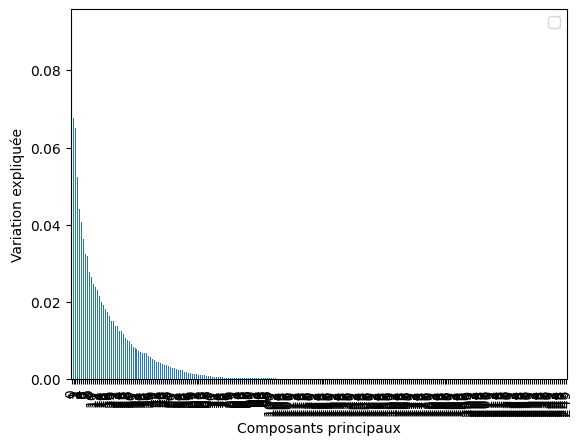

In [36]:
#On observe la variance des composants principaux pdéterminer combien on en conserve
import matplotlib.pyplot as plt
pd.DataFrame(pca.explained_variance_ratio_).plot.bar()
plt.legend('')
plt.xlabel('Composants principaux')
plt.ylabel('Variation expliquée')

In [37]:
len(pca.explained_variance_ratio_)
pca.explained_variance_ratio_[1]

0.06764515185140943

In [38]:
nbCompoPrec=0
somme=0
for i in range(0, len(pca.explained_variance_ratio_)-1):
    somme=somme+pca.explained_variance_ratio_[i]
    if(somme>0.8):
        print("Somme=", somme)
        print("Nb de composants principaux=", i+1)
        break

Somme= 0.8054127604981864
Nb de composants principaux= 28


In [39]:
df_pca_reduit = df_pca.loc[:,0:27]

In [40]:
df_pca_reduit.axes

[RangeIndex(start=0, stop=364047, step=1),
 RangeIndex(start=0, stop=28, step=1)]

In [86]:
topn=5

In [97]:
from sklearn.metrics.pairwise import linear_kernel, cosine_similarity

df_user_profile=df_pca_reduit.loc[500,:]
cosine_similarities = cosine_similarity(df_user_profile.values.reshape(1, -1), df_pca_reduit)
similar_indices = cosine_similarities.argsort().flatten()[-topn:]
        # #Sort the similar items by similarity
        # similar_items = sorted([(item_ids[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])
        # return similar_items

In [98]:
similar_indices = cosine_similarities.argsort().flatten()[-topn:]

In [99]:
similar_items = sorted([(article_metadata.article_id[i], cosine_similarities[0,i]) for i in similar_indices], key=lambda x: -x[1])

In [100]:
similar_items

[(229250, 158.86963),
 (229245, 155.79268),
 (228324, 154.11856),
 (228627, 152.7821),
 (165736, 152.7659)]